In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "../data/sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display first few rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Convert ORDERDATE to datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], errors="coerce")

# Drop unnecessary columns
df_cleaned = df.drop(columns=["ADDRESSLINE2", "STATE", "POSTALCODE", "TERRITORY"])

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Verify changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

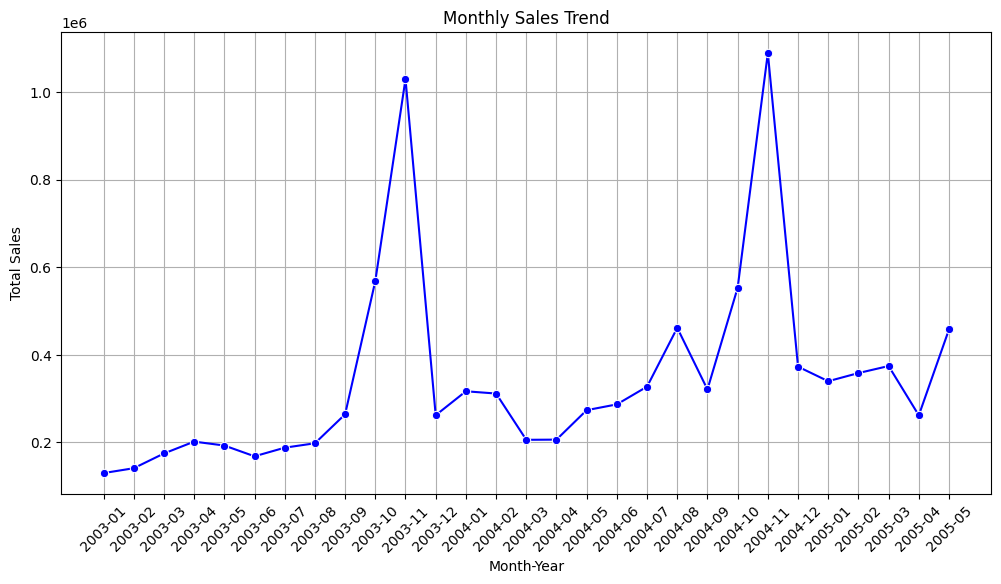

In [4]:
# Aggregate sales by month and year
df_cleaned["YEAR_MONTH"] = df_cleaned["ORDERDATE"].dt.to_period("M")
monthly_sales = df_cleaned.groupby("YEAR_MONTH")["SALES"].sum().reset_index()

# Convert YEAR_MONTH to string
monthly_sales["YEAR_MONTH"] = monthly_sales["YEAR_MONTH"].astype(str)

# Plot sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="YEAR_MONTH", y="SALES", marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

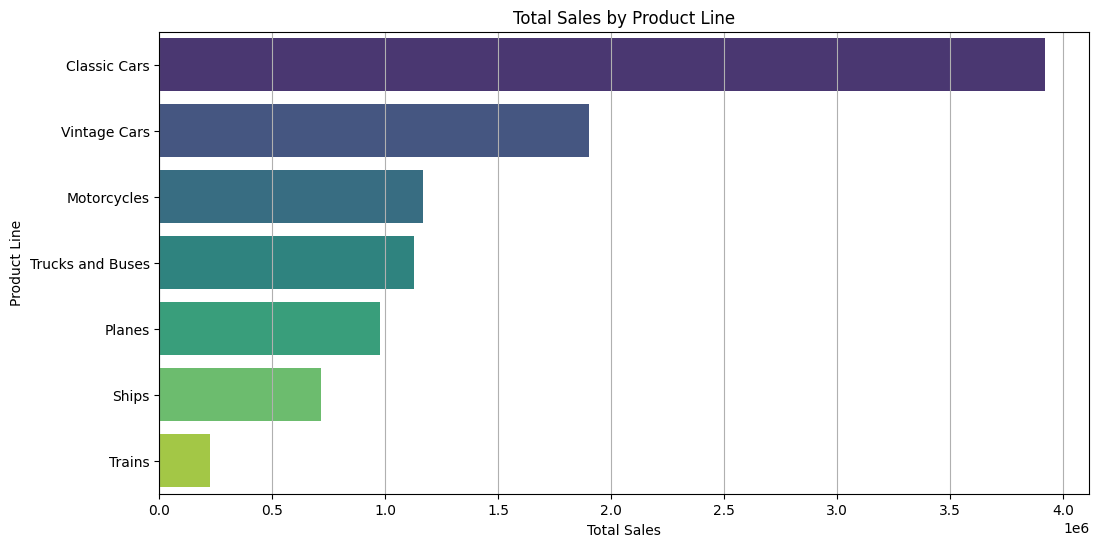

In [8]:
# Aggregate sales by product line
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, x="SALES", y="PRODUCTLINE", hue="PRODUCTLINE", palette="viridis", legend=False)
plt.title("Total Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.grid(axis="x")
plt.show()

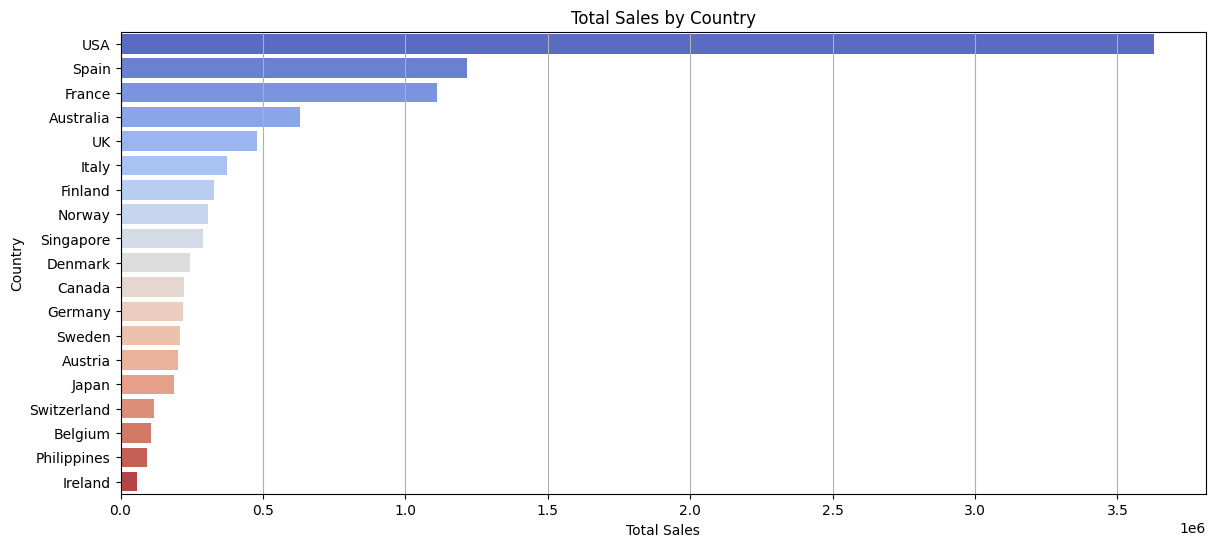

In [9]:
# Aggregate sales by country
plt.figure(figsize=(14, 6))
sns.barplot(data=country_sales, x="SALES", y="COUNTRY", hue="COUNTRY", palette="coolwarm", legend=False)
plt.title("Total Sales by Country")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.grid(axis="x")
plt.show()

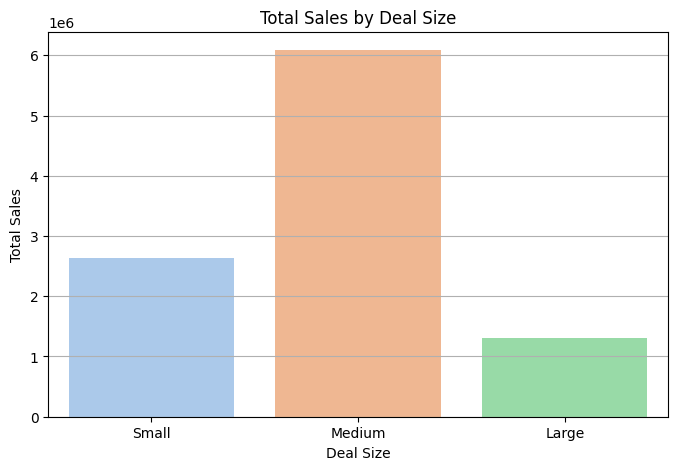

In [10]:
# Aggregate sales by deal size
plt.figure(figsize=(8, 5))
sns.barplot(data=deal_size_sales, x="DEALSIZE", y="SALES", hue="DEALSIZE", palette="pastel", legend=False)
plt.title("Total Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Total Sales")
plt.grid(axis="y")
plt.show()

In [11]:
plt.savefig("../images/sales_trend.png")
plt.savefig("../images/sales_by_product.png")
plt.savefig("../images/sales_by_country.png")
plt.savefig("../images/sales_by_deal_size.png")

<Figure size 640x480 with 0 Axes>

In [12]:
# Define the path where you want to save the cleaned dataset
cleaned_file_path = "../data/sales_data_cleaned.csv"

# Save the cleaned DataFrame as a CSV file
df_cleaned.to_csv(cleaned_file_path, index=False)

# Confirm the file is saved
print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")


Cleaned dataset saved successfully at: ../data/sales_data_cleaned.csv
